In [165]:
# step - 1 : Libraries & Enviornment Setup

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [166]:
# Load All datasets

df_raw = pd.read_csv(r"/content/ecommerc_customer_data_large.csv")

df_ratios = pd.read_csv(r"/content/ecommerc_customer_data_custom_ratios.csv")

In [167]:
 # First Look

df_raw.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1.0,John Rivera,31,Female,0
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1.0,John Rivera,31,Female,0
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,1.0,John Rivera,31,Female,0
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,31,0.0,John Rivera,31,Female,0
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,31,1.0,John Rivera,31,Female,0


In [168]:
df_ratios.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,46251,2020-09-08 09:38:32,Electronics,12,3,740,Credit Card,37,0.0,Christine Hernandez,37,Male,0
1,46251,2022-03-05 12:56:35,Home,468,4,2739,PayPal,37,0.0,Christine Hernandez,37,Male,0
2,46251,2022-05-23 18:18:01,Home,288,2,3196,PayPal,37,0.0,Christine Hernandez,37,Male,0
3,46251,2020-11-12 13:13:29,Clothing,196,1,3509,PayPal,37,0.0,Christine Hernandez,37,Male,0
4,13593,2020-11-27 17:55:11,Home,449,1,3452,Credit Card,49,0.0,James Grant,49,Female,1


In [169]:
# structure & Size

df_raw.shape, df_ratios.shape

df_raw.info(), df_ratios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total Purchase Amount  250000 non-null  int64  
 6   Payment Method         250000 non-null  object 
 7   Customer Age           250000 non-null  int64  
 8   Returns                202618 non-null  float64
 9   Customer Name          250000 non-null  object 
 10  Age                    250000 non-null  int64  
 11  Gender                 250000 non-null  object 
 12  Churn                  250000 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 24.8+ MB
<class 'pandas.core.frame.DataF

(None, None)

In [170]:
# Step 2 Check:  Customer-level

df_raw['Customer ID'].value_counts().head()

,count
Customer ID,
48382,17
8770,16
4200,16
25927,15
13805,15


In [171]:
df_ratios['Customer ID'].value_counts().head()

,count
Customer ID,
39817,17
47087,17
36437,17
12529,15
809,15


In [172]:
# Name Consistency Check

df_raw.groupby('Customer ID')['Customer Name'].nunique().sort_values(ascending=False).head()

,Customer Name
Customer ID,
50000,1
1,1
2,1
3,1
4,1


In [173]:
df_ratios.groupby('Customer ID')['Customer Name'].nunique().sort_values(ascending=False).head()


,Customer Name
Customer ID,
50000,1
1,1
2,1
3,1
4,1


In [174]:
# Step - 3 :  Cross-Dataset Validation

name_compare = (
    df_raw[['Customer ID', 'Customer Name']]
    .drop_duplicates()
    .merge(
        df_ratios[['Customer ID', 'Customer Name']].drop_duplicates(),
        on='Customer ID',
        suffixes=('_raw', '_ratios')
    )
)

name_compare[name_compare['Customer Name_raw'] != name_compare['Customer Name_ratios']].head()


,Customer ID,Customer Name_raw,Customer Name_ratios
0,44605,John Rivera,Stephanie Martinez
1,13738,Lauren Johnson,Brent Houston
2,33969,Carol Allen,Matthew Gutierrez
3,42650,Curtis Smith,Cindy Reid
4,24053,Jose Green,Mary Neal


### Cross-Dataset Customer Identity Validation

We compared customer names across the two datasets using the same Customer ID.
We found that the same Customer ID had different customer names in each dataset
(e.g., John Rivera in one dataset and Stephanie Martinez in the other).

This shows that the datasets do not use the same customer reference.
To avoid incorrect assumptions and mixed data, only the raw transaction dataset
was used for the analysis.


In [175]:
# Step - 4 : Data Cleaning
# Missing Values Check

df_raw.isnull().sum()

,0
Customer ID,0
Purchase Date,0
Product Category,0
Product Price,0
Quantity,0
Total Purchase Amount,0
Payment Method,0
Customer Age,0
Returns,47382
Customer Name,0


In [176]:
# Handle Missing Values
# Return : binary indicator( 1 = returned, 0 = not returned)

df_raw['Returns'] = df_raw['Returns'].fillna(0)
df_raw.isnull().sum()

,0
Customer ID,0
Purchase Date,0
Product Category,0
Product Price,0
Quantity,0
Total Purchase Amount,0
Payment Method,0
Customer Age,0
Returns,0
Customer Name,0


In [177]:
# Data Format Fix

df_raw['Purchase Date'] = pd.to_datetime(df_raw['Purchase Date'])
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Customer ID            250000 non-null  int64         
 1   Purchase Date          250000 non-null  datetime64[ns]
 2   Product Category       250000 non-null  object        
 3   Product Price          250000 non-null  int64         
 4   Quantity               250000 non-null  int64         
 5   Total Purchase Amount  250000 non-null  int64         
 6   Payment Method         250000 non-null  object        
 7   Customer Age           250000 non-null  int64         
 8   Returns                250000 non-null  float64       
 9   Customer Name          250000 non-null  object        
 10  Age                    250000 non-null  int64         
 11  Gender                 250000 non-null  object        
 12  Churn                  250000 non-null  int6

In [178]:
# Remove duplicates If any

df_raw = df_raw.drop_duplicates()

In [179]:
# Final Clean Check

df_raw.info()
df_raw.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Customer ID            250000 non-null  int64         
 1   Purchase Date          250000 non-null  datetime64[ns]
 2   Product Category       250000 non-null  object        
 3   Product Price          250000 non-null  int64         
 4   Quantity               250000 non-null  int64         
 5   Total Purchase Amount  250000 non-null  int64         
 6   Payment Method         250000 non-null  object        
 7   Customer Age           250000 non-null  int64         
 8   Returns                250000 non-null  float64       
 9   Customer Name          250000 non-null  object        
 10  Age                    250000 non-null  int64         
 11  Gender                 250000 non-null  object        
 12  Churn                  250000 non-null  int6

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1.0,John Rivera,31,Female,0
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1.0,John Rivera,31,Female,0
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,1.0,John Rivera,31,Female,0
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,31,0.0,John Rivera,31,Female,0
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,31,1.0,John Rivera,31,Female,0


In [180]:
# Step - 5 :  Feature Engineering (Customer-Level Table)
# Aggregate Trasaction - Customer

customer_df = df_raw.groupby('Customer ID').agg(
      Total_Order = ('Purchase Date', 'count'),
      Total_quantity =('Quantity', 'sum'),
      Total_spent = ('Total Purchase Amount', 'sum'),
      Avg_Order_value = ('Total Purchase Amount', 'mean'),
      Last_purchase_date = ('Purchase Date', 'max'),
      Total_return = ('Returns', 'sum'),
      Churn = ('Churn', 'max'),
      Age = ('Age', 'first'),
      Gender = ('Gender', 'first')
).reset_index()

customer_df.head()

,Customer ID,Total_Order,Total_quantity,Total_spent,Avg_Order_value,Last_purchase_date,Total_return,Churn,Age,Gender
0,1,3,15,6290,2096.666667,2022-11-29 06:48:25,0.0,0,67,Female
1,2,6,18,16481,2746.833333,2023-07-03 17:26:19,4.0,0,42,Female
2,3,4,15,9423,2355.750000,2023-02-03 03:58:07,0.0,0,31,Male
3,4,5,19,7826,1565.200000,2022-06-29 03:41:09,3.0,0,37,Male
4,5,5,13,9769,1953.800000,2022-07-16 04:08:09,3.0,0,24,Female


In [181]:
# Recency Feature (Time-based behavior)

Reference_date = df_raw['Purchase Date'].max()
customer_df['Recency_days'] = (Reference_date - customer_df['Last_purchase_date']).dt.days


In [182]:
# Validate Customer-Level Dataset

customer_df.info()
customer_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49661 entries, 0 to 49660
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Customer ID         49661 non-null  int64         
 1   Total_Order         49661 non-null  int64         
 2   Total_quantity      49661 non-null  int64         
 3   Total_spent         49661 non-null  int64         
 4   Avg_Order_value     49661 non-null  float64       
 5   Last_purchase_date  49661 non-null  datetime64[ns]
 6   Total_return        49661 non-null  float64       
 7   Churn               49661 non-null  int64         
 8   Age                 49661 non-null  int64         
 9   Gender              49661 non-null  object        
 10  Recency_days        49661 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(7), object(1)
memory usage: 4.2+ MB


,Customer ID,Total_Order,Total_quantity,Total_spent,Avg_Order_value,Last_purchase_date,Total_return,Churn,Age,Gender,Recency_days
0,1,3,15,6290,2096.666667,2022-11-29 06:48:25,0.0,0,67,Female,288
1,2,6,18,16481,2746.833333,2023-07-03 17:26:19,4.0,0,42,Female,72
2,3,4,15,9423,2355.750000,2023-02-03 03:58:07,0.0,0,31,Male,222
3,4,5,19,7826,1565.200000,2022-06-29 03:41:09,3.0,0,37,Male,441
4,5,5,13,9769,1953.800000,2022-07-16 04:08:09,3.0,0,24,Female,424


In [183]:
# Step - 6 : RFM (Customer segmentation)
# Data Check

customer_df[['Recency_days', 'Total_Order', 'Total_spent']].head()


,Recency_days,Total_Order,Total_spent
0,288,3,6290
1,72,6,16481
2,222,4,9423
3,441,5,7826
4,424,5,9769


In [184]:
# Step - 7 : R,F,M scores

# R score (recent customers ko high score)

customer_df['R_score'] = pd.qcut(
    customer_df['Recency_days'],
    4,
    labels = [4,3,2,1]
)


customer_df

,Customer ID,Total_Order,Total_quantity,Total_spent,Avg_Order_value,Last_purchase_date,Total_return,Churn,Age,Gender,Recency_days,R_score
0,1,3,15,6290,2096.666667,2022-11-29 06:48:25,0.0,0,67,Female,288,2
1,2,6,18,16481,2746.833333,2023-07-03 17:26:19,4.0,0,42,Female,72,4
2,3,4,15,9423,2355.750000,2023-02-03 03:58:07,0.0,0,31,Male,222,2
3,4,5,19,7826,1565.200000,2022-06-29 03:41:09,3.0,0,37,Male,441,1
4,5,5,13,9769,1953.800000,2022-07-16 04:08:09,3.0,0,24,Female,424,1
...,...,...,...,...,...,...,...,...,...,...,...,...
49656,49996,7,25,24034,3433.428571,2022-09-19 00:20:18,2.0,0,45,Female,359,2
49657,49997,2,8,5714,2857.000000,2022-08-21 12:46:16,0.0,0,65,Male,388,1
49658,49998,10,30,20495,2049.500000,2023-08-31 11:32:30,6.0,1,31,Female,13,4
49659,49999,6,20,14321,2386.833333,2022-09-22 15:46:41,3.0,0,70,Female,356,2


In [185]:
# F_score (frequent buyers ko high score)

customer_df['F_score'] = pd.qcut(
    customer_df['Total_Order'],
    4,
    labels=[1, 2, 3, 4]
)



In [186]:
# M_score(high spenders ko high score)

customer_df['M_score'] = pd.qcut(
    customer_df['Total_spent'],
    4,
    labels = [1,2,3,4]
)

In [203]:
customer_df['RFM_score'] = (
    customer_df['R_score'].astype(int) +
    customer_df['F_score'].astype(int) +
    customer_df['M_score'].astype(int)
)

customer_df.head()

,Customer ID,Total_Order,Total_quantity,Total_spent,Avg_Order_value,Last_purchase_date,Total_return,Churn,Age,Gender,Recency_days,R_score,F_score,M_score,RFM_score,Segment
0,1,3,15,6290,2096.666667,2022-11-29 06:48:25,0.0,0,67,Female,288,2,1,1,4,Low-Value
1,2,6,18,16481,2746.833333,2023-07-03 17:26:19,4.0,0,42,Female,72,4,3,3,10,High-Value
2,3,4,15,9423,2355.750000,2023-02-03 03:58:07,0.0,0,31,Male,222,2,2,2,6,Mid-Value
3,4,5,19,7826,1565.200000,2022-06-29 03:41:09,3.0,0,37,Male,441,1,2,1,4,Low-Value
4,5,5,13,9769,1953.800000,2022-07-16 04:08:09,3.0,0,24,Female,424,1,2,2,5,Low-Value


In [188]:
# customer segments

def segment_customer(score):
    if score >= 10:
        return 'High-Value'
    elif score >= 6:
        return 'Mid-Value'
    else:
        return 'Low-Value'

customer_df['Segment'] = customer_df['RFM_score'].apply(segment_customer)
customer_df.head()

,Customer ID,Total_Order,Total_quantity,Total_spent,Avg_Order_value,Last_purchase_date,Total_return,Churn,Age,Gender,Recency_days,R_score,F_score,M_score,RFM_score,Segment
0,1,3,15,6290,2096.666667,2022-11-29 06:48:25,0.0,0,67,Female,288,2,1,1,4,Low-Value
1,2,6,18,16481,2746.833333,2023-07-03 17:26:19,4.0,0,42,Female,72,4,3,3,10,High-Value
2,3,4,15,9423,2355.750000,2023-02-03 03:58:07,0.0,0,31,Male,222,2,2,2,6,Mid-Value
3,4,5,19,7826,1565.200000,2022-06-29 03:41:09,3.0,0,37,Male,441,1,2,1,4,Low-Value
4,5,5,13,9769,1953.800000,2022-07-16 04:08:09,3.0,0,24,Female,424,1,2,2,5,Low-Value


In [189]:
customer_df[['Customer ID', 'RFM_score' , 'Segment']].head()

,Customer ID,RFM_score,Segment
0,1,4,Low-Value
1,2,10,High-Value
2,3,6,Mid-Value
3,4,4,Low-Value
4,5,5,Low-Value


In [190]:
# Count of customers in each segment

customer_df['Segment'].value_counts()

,count
Segment,
Mid-Value,22908
Low-Value,13837
High-Value,12916


In [191]:
# Step - 8 : SEGMENT PROFILING
# Segment-wise metrics nikaalna

segment_profile = customer_df.groupby('Segment').agg(
    total_customers=('Customer ID', 'count'),
    avg_recency_days=('Recency_days', 'mean'),
    avg_orders=('Total_Order', 'mean'),
    avg_spent=('Total_spent', 'mean'),
    total_revenue=('Total_spent', 'sum')
).reset_index()

segment_profile


,Segment,total_customers,avg_recency_days,avg_orders,avg_spent,total_revenue
0,High-Value,12916,101.862264,7.685197,21690.672190,280156722
1,Low-Value,13837,499.143890,2.825468,7006.799089,96953079
2,Mid-Value,22908,207.607342,4.873494,13280.797014,304236498


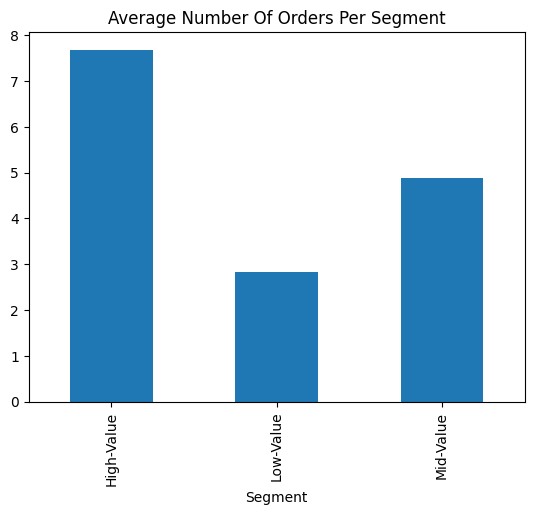

In [204]:
# Step - 9 : Visualization of Purchase Patterns and Retention Trends
# Visualization 1 : Average Number Of Orders Per Segment

customer_df.groupby('Segment')['Total_Order'].mean().plot(
    kind = 'bar',
    title = 'Average Number Of Orders Per Segment'
)
plt.show()

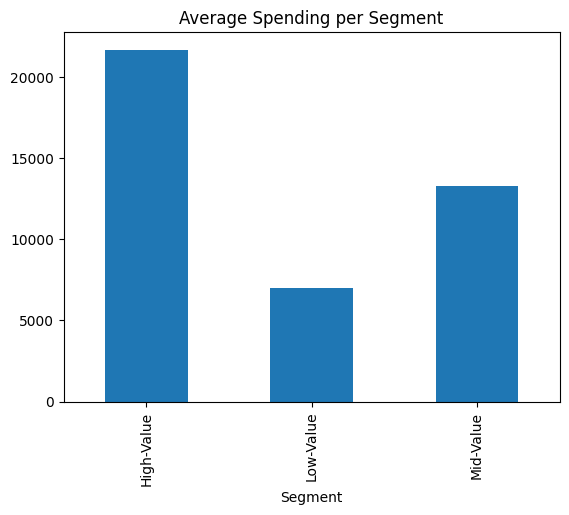

In [193]:
# Visualization 2 : Average Spending per Segment

customer_df.groupby('Segment')['Total_spent'].mean().plot(
    kind='bar',
    title='Average Spending per Segment'
)
plt.show()

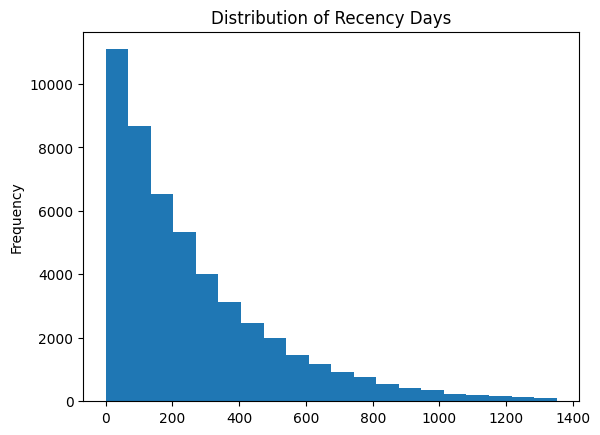

In [194]:
# Visualization 3 : Distribution of Recency Days

customer_df['Recency_days'].plot(
    kind='hist',
    bins=20,
    title='Distribution of Recency Days'
)
plt.show()

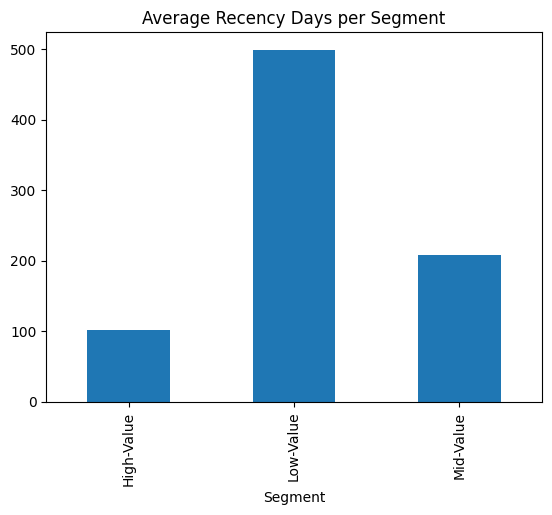

In [195]:
# Visualization 4 : Average Recency Days per Segment

customer_df.groupby('Segment')['Recency_days'].mean().plot(
    kind='bar',
    title='Average Recency Days per Segment'
)
plt.show()

In [196]:
customer_df

,Customer ID,Total_Order,Total_quantity,Total_spent,Avg_Order_value,Last_purchase_date,Total_return,Churn,Age,Gender,Recency_days,R_score,F_score,M_score,RFM_score,Segment
0,1,3,15,6290,2096.666667,2022-11-29 06:48:25,0.0,0,67,Female,288,2,1,1,4,Low-Value
1,2,6,18,16481,2746.833333,2023-07-03 17:26:19,4.0,0,42,Female,72,4,3,3,10,High-Value
2,3,4,15,9423,2355.750000,2023-02-03 03:58:07,0.0,0,31,Male,222,2,2,2,6,Mid-Value
3,4,5,19,7826,1565.200000,2022-06-29 03:41:09,3.0,0,37,Male,441,1,2,1,4,Low-Value
4,5,5,13,9769,1953.800000,2022-07-16 04:08:09,3.0,0,24,Female,424,1,2,2,5,Low-Value
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49656,49996,7,25,24034,3433.428571,2022-09-19 00:20:18,2.0,0,45,Female,359,2,4,4,10,High-Value
49657,49997,2,8,5714,2857.000000,2022-08-21 12:46:16,0.0,0,65,Male,388,1,1,1,3,Low-Value
49658,49998,10,30,20495,2049.500000,2023-08-31 11:32:30,6.0,1,31,Female,13,4,4,4,12,High-Value
49659,49999,6,20,14321,2386.833333,2022-09-22 15:46:41,3.0,0,70,Female,356,2,3,3,8,Mid-Value


In [197]:
# Step - 10 : Customer Segment Insights and Business Findings

insights_table = customer_df.groupby('Segment').agg(
    total_customers =  ('Customer ID' , 'count'),
    Avg_Orders = ('Total_quantity', 'mean'),
    Avg_spent = ('Total_spent', 'mean'),
    Avg_recency_days = ('Recency_days', 'mean'),
    total_revenue = ('Total_spent', 'sum')
 ).reset_index()

insights_table

,Segment,total_customers,Avg_Orders,Avg_spent,Avg_recency_days,total_revenue
0,High-Value,12916,23.104754,21690.672190,101.862264,280156722
1,Low-Value,13837,8.483197,7006.799089,499.143890,96953079
2,Mid-Value,22908,14.642527,13280.797014,207.607342,304236498


In [198]:
# Revenue Contribution by Segment (%)

segment_revenue_pct = (
    customer_df.groupby('Segment')['Total_spent'].sum()
    / customer_df['Total_spent'].sum()
) * 100

segment_revenue_pct


,Total_spent
Segment,
High-Value,41.118110
Low-Value,14.229633
Mid-Value,44.652257


In [199]:
# Purchase Frequency (Loyalty) Comparison

purchase_frequency = customer_df.groupby('Segment')['Total_Order'].mean().sort_values(ascending= False)

purchase_frequency

,Total_Order
Segment,
High-Value,7.685197
Mid-Value,4.873494
Low-Value,2.825468


In [200]:
# Retention / Churn Risk (Recency Comparison)
customer_df.groupby('Segment')['Recency_days'].mean().sort_values(ascending=False)


,Recency_days
Segment,
Low-Value,499.143890
Mid-Value,207.607342
High-Value,101.862264


In [201]:
# Per-Customer Value (Average Spend)

customer_df.groupby('Segment')['Total_spent'].mean().sort_values(ascending=False)


,Total_spent
Segment,
High-Value,21690.672190
Mid-Value,13280.797014
Low-Value,7006.799089


In [202]:
customer_df['Segment'].value_counts()


,count
Segment,
Mid-Value,22908
Low-Value,13837
High-Value,12916


## Step-10: Actionable Recommendations to Improve Customer Engagement

1. **Focus on High-Value Customers**  
   High-Value customers purchase frequently and spend more. Alfido Tech should retain them through loyalty programs, exclusive offers, and personalized communication.

2. **Grow Mid-Value Customers**  
   Mid-Value customers form the largest segment and generate high revenue. Targeted promotions and product recommendations can help convert them into High-Value customers.

3. **Re-engage Low-Value Customers**  
   Low-Value customers show low activity and higher churn risk. Limited-time offers and reminder campaigns can help bring them back.

4. **Adopt Segment-Based Marketing**  
   Customer behavior differs across segments. Alfido Tech should design separate engagement strategies for each customer segment instead of using a one-size-fits-all approach.

5. **Monitor Customer Activity Regularly**  
   Tracking purchase frequency and recency helps identify inactive customers early, allowing timely engagement to improve retention.


## Step-11: Final Conclusion

This project analyzed customer purchase behavior using transaction-level data and transformed it into customer-level insights through RFM-based segmentation. Customers were classified into High-Value, Mid-Value, and Low-Value segments based on recency, frequency, and monetary metrics.



The analysis showed that High-Value customers are the most loyal with the highest purchase frequency and spending, while Mid-Value customers contribute the highest total revenue due to their larger population. Low-Value customers exhibit high inactivity, indicating a higher risk of churn.



Based on these findings, segment-specific strategies were recommended to improve customer retention, drive revenue growth, and reduce churn. Overall, this project demonstrates how customer segmentation can support effective, data-driven business decision-making.
